<a href="https://colab.research.google.com/github/geetha575/SmartStock_inventory_optimization_dashboard/blob/main/MILESTONE_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
raw_data=pd.read_csv('/content/raw_inventory_dataset.csv')

Step 2: Understanding the Data

In [ ]:
raw_data.shape

(5000, 14)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           5000 non-null   object
 1   Product_ID     5000 non-null   object
 2   Product_Name   5000 non-null   object
 3   Product_Type   5000 non-null   object
 4   Store_ID       5000 non-null   object
 5   Region         5000 non-null   object
 6   City           5000 non-null   object
 7   Units_On_Hand  5000 non-null   int64 
 8   Reorder_Level  5000 non-null   int64 
 9   Unit_Cost      5000 non-null   int64 
 10  Unit_Price     5000 non-null   int64 
 11  Discount       5000 non-null   object
 12  Supplier       5000 non-null   object
 13  Seasonality    5000 non-null   object
dtypes: int64(4), object(10)
memory usage: 547.0+ KB


In [ ]:
raw_data.head()

,Date,Product_ID,Product_Name,Product_Type,Store_ID,Region,City,Units_On_Hand,Reorder_Level,Unit_Cost,Unit_Price,Discount,Supplier,Seasonality
0,01-01-2024,P00015,Tata Tea 250g,Food & Beverage,S15,East,Bhubaneswar,35,65,28361,30926,15%,Tata,Winter
1,01-01-2024,P00016,LG Refrigerator,Electronics,S14,North,Lucknow,69,80,30573,34843,5%,LG,Summer
2,01-01-2024,P00005,Dove Soap 100g,Personal Care,S38,South,Bangalore,423,7,2680,7323,0%,Unilever,All-Season
3,01-01-2024,P00010,Amul Butter 500g,Food & Beverage,S39,North,Lucknow,386,12,25105,30073,5%,Amul,Winter
4,01-01-2024,P00019,Adidas T-Shirt,Apparel,S11,East,Bhubaneswar,117,64,26301,30311,5%,Adidas,All-Season


In [ ]:
raw_data.describe()

,Units_On_Hand,Reorder_Level,Unit_Cost,Unit_Price
count,5000.00000,5000.00000,5000.000000,5000.000000
mean,253.00600,51.71600,19797.547800,22301.533600
std,141.59225,27.67159,11632.247666,11733.925575
min,10.00000,5.00000,19.000000,257.000000
25%,129.00000,28.00000,9616.250000,12152.000000
50%,252.00000,51.50000,19924.500000,22396.500000
75%,372.00000,76.00000,29969.250000,32523.750000
max,500.00000,100.00000,39996.000000,44685.000000


Step 3: Handle Missing Values

In [ ]:
raw_data.drop_duplicates(inplace=True)
raw_data

,Date,Product_ID,Product_Name,Product_Type,Store_ID,Region,City,Units_On_Hand,Reorder_Level,Unit_Cost,Unit_Price,Discount,Supplier,Seasonality
0,01-01-2024,P00015,Tata Tea 250g,Food & Beverage,S15,East,Bhubaneswar,35,65,28361,30926,15%,Tata,Winter
1,01-01-2024,P00016,LG Refrigerator,Electronics,S14,North,Lucknow,69,80,30573,34843,5%,LG,Summer
2,01-01-2024,P00005,Dove Soap 100g,Personal Care,S38,South,Bangalore,423,7,2680,7323,0%,Unilever,All-Season
3,01-01-2024,P00010,Amul Butter 500g,Food & Beverage,S39,North,Lucknow,386,12,25105,30073,5%,Amul,Winter
4,01-01-2024,P00019,Adidas T-Shirt,Apparel,S11,East,Bhubaneswar,117,64,26301,30311,5%,Adidas,All-Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26-10-2025,P00013,Britannia Biscuits,Food & Beverage,S38,East,Kolkata,36,49,12090,12549,0%,Britannia,All-Season
4996,26-10-2025,P00016,LG Refrigerator,Electronics,S15,West,Mumbai,483,54,17629,17928,10%,LG,Summer
4997,26-10-2025,P00020,Raymond Shirt,Apparel,S47,East,Kolkata,310,72,3981,8972,10%,Raymond,Festive
4998,27-10-2025,P00003,Coca Cola 500ml,Food & Beverage,S33,East,Bhubaneswar,98,73,13924,15036,15%,CocaCola,Summer


In [ ]:
raw_data.isnull().sum()

,0
Date,0
Product_ID,0
Product_Name,0
Product_Type,0
Store_ID,0
Region,0
City,0
Units_On_Hand,0
Reorder_Level,0
Unit_Cost,0


In [ ]:
display(raw_data)


,Date,Product_ID,Product_Name,Product_Type,Store_ID,Region,City,Units_On_Hand,Reorder_Level,Unit_Cost,Unit_Price,Discount,Supplier,Seasonality
0,01-01-2024,P00015,Tata Tea 250g,Food & Beverage,S15,East,Bhubaneswar,35,65,28361,30926,15%,Tata,Winter
1,01-01-2024,P00016,LG Refrigerator,Electronics,S14,North,Lucknow,69,80,30573,34843,5%,LG,Summer
2,01-01-2024,P00005,Dove Soap 100g,Personal Care,S38,South,Bangalore,423,7,2680,7323,0%,Unilever,All-Season
3,01-01-2024,P00010,Amul Butter 500g,Food & Beverage,S39,North,Lucknow,386,12,25105,30073,5%,Amul,Winter
4,01-01-2024,P00019,Adidas T-Shirt,Apparel,S11,East,Bhubaneswar,117,64,26301,30311,5%,Adidas,All-Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26-10-2025,P00013,Britannia Biscuits,Food & Beverage,S38,East,Kolkata,36,49,12090,12549,0%,Britannia,All-Season
4996,26-10-2025,P00016,LG Refrigerator,Electronics,S15,West,Mumbai,483,54,17629,17928,10%,LG,Summer
4997,26-10-2025,P00020,Raymond Shirt,Apparel,S47,East,Kolkata,310,72,3981,8972,10%,Raymond,Festive
4998,27-10-2025,P00003,Coca Cola 500ml,Food & Beverage,S33,East,Bhubaneswar,98,73,13924,15036,15%,CocaCola,Summer


## Identify numerical columns for Outliers

### Subtask:
Determine which columns in `raw_data` are numerical and suitable for outlier detection.


In [ ]:
numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns suitable for outlier detection:")
for col in numerical_cols:
    print(col)

Numerical columns suitable for outlier detection:
Units_On_Hand
Reorder_Level
Unit_Cost
Unit_Price


**Reasoning**:
Identify the numerical columns from the dataframe's info and head to determine which ones are suitable for outlier detection.



## Visualize data distributions

### Subtask:
Create visualizations (e.g., box plots, histograms) for the numerical columns to visually identify potential outliers.


**Reasoning**:
Create box plots and histograms for the numerical columns to visualize potential outliers.



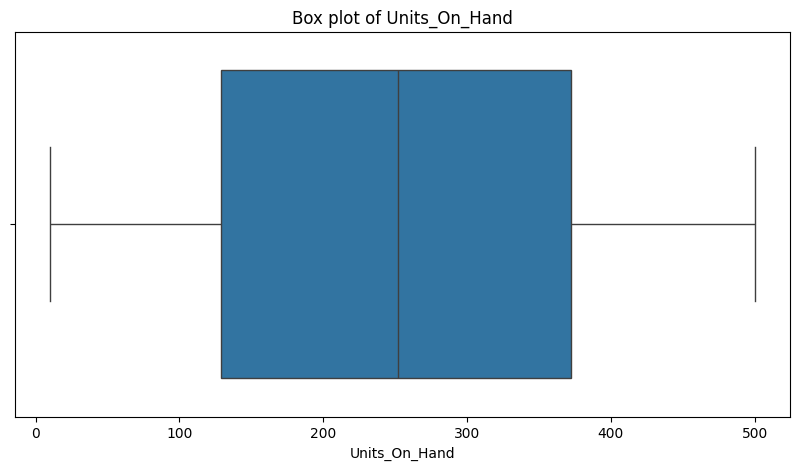

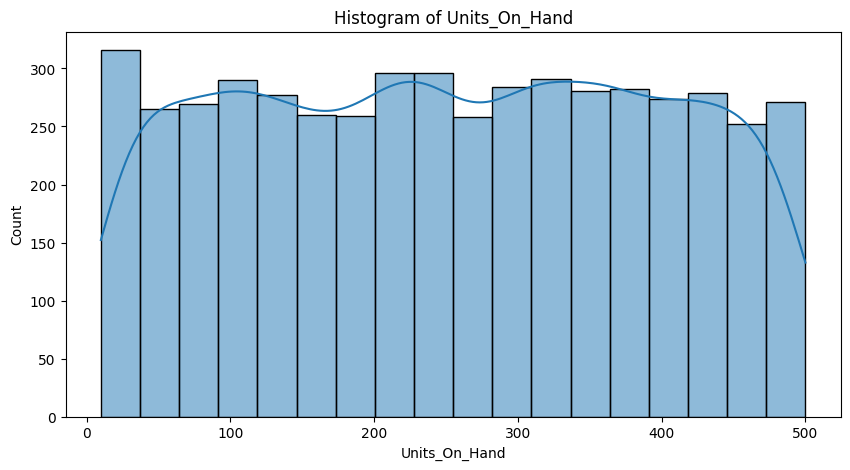

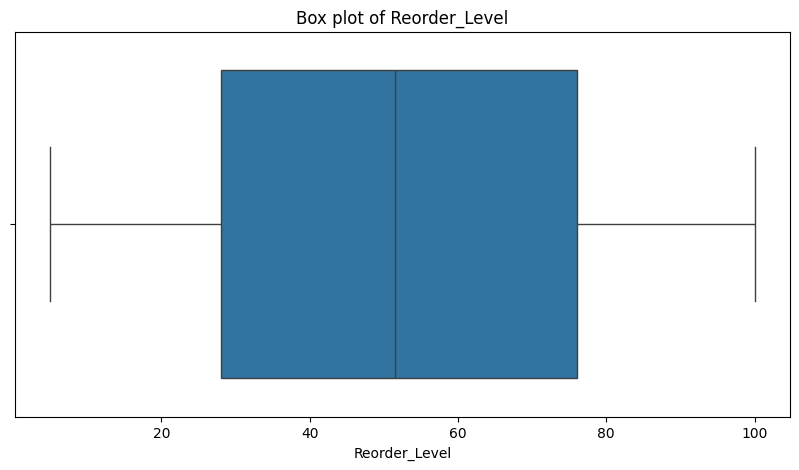

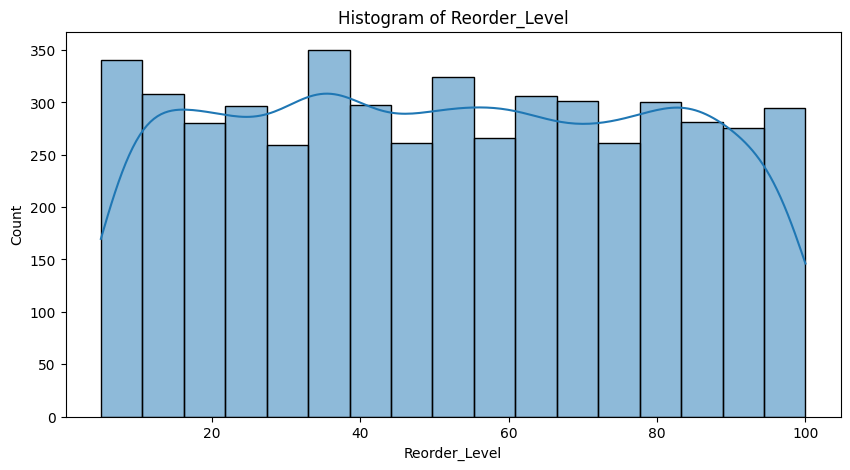

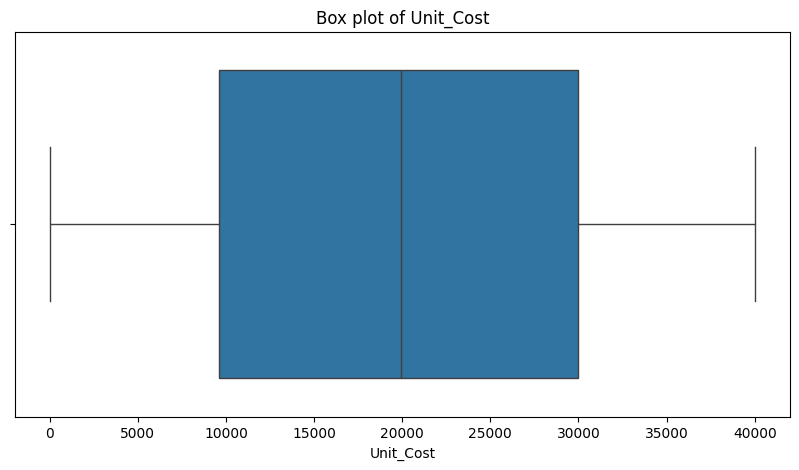

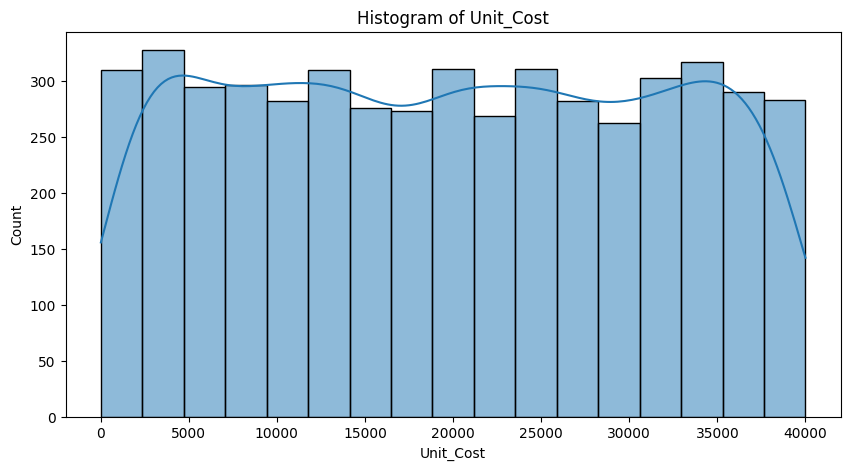

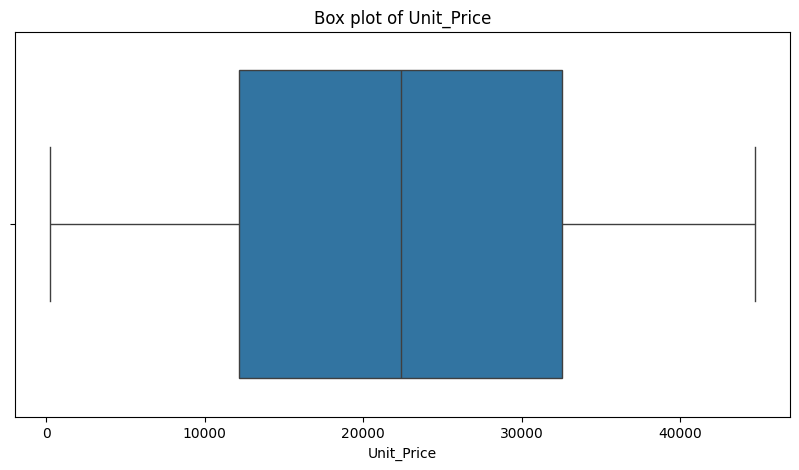

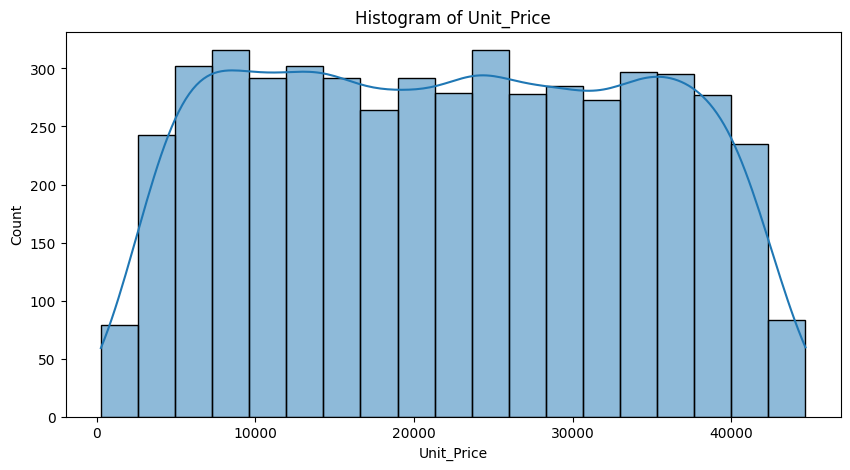

In [ ]:
numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=raw_data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.histplot(data=raw_data, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

## Choose an outlier detection method

### Subtask:
Select an appropriate statistical method for outlier detection (e.g., Z-score, IQR).


## Implement outlier detection

### Subtask:
Apply the chosen method (IQR) to the numerical columns to identify outliers.


## Handle outliers

### Subtask:
Decide on a strategy to handle the detected outliers (e.g., removal, capping, transformation) and implement it.


In [ ]:
def detect_outliers_iqr(df, column):
    """
    Detects outliers in a numerical column using the IQR method.

    Args:
        df: pandas DataFrame
        column: Name of the numerical column

    Returns:
        DataFrame containing rows identified as outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()

outliers_dfs = {}
for col in numerical_cols:
    outliers_dfs[col] = detect_outliers_iqr(raw_data, col)
    print(f"Shape of outliers in '{col}': {outliers_dfs[col].shape}")

Shape of outliers in 'Units_On_Hand': (0, 14)
Shape of outliers in 'Reorder_Level': (0, 14)
Shape of outliers in 'Unit_Cost': (0, 14)
Shape of outliers in 'Unit_Price': (0, 14)


**Reasoning**:
No outliers were detected in the previous steps, so I will use the describe() method on the raw_data DataFrame to display descriptive statistics for all numerical columns and confirm that no handling was needed.



# Task
Analyze the `raw_data` to visualize the top products sold, the regional sales of different product types, and the impact of discounts on sales.

## Create visualizations

### Subtask:
Generate appropriate plots (e.g., bar plots, heatmaps, scatter plots) to visualize the findings.


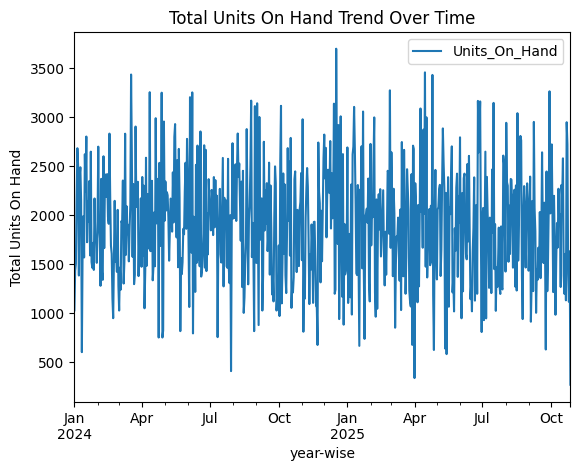

In [ ]:
sales_trend = raw_data.groupby('Date')['Units_On_Hand'].sum().reset_index()
sales_trend['Date'] = pd.to_datetime(sales_trend['Date'], format='%d-%m-%Y')
sales_trend = sales_trend.sort_values('Date')
sales_trend.plot(x='Date', y='Units_On_Hand', kind='line', title='Total Units On Hand Trend Over Time')
plt.xlabel('year-wise')
plt.ylabel('Total Units On Hand')
plt.show()

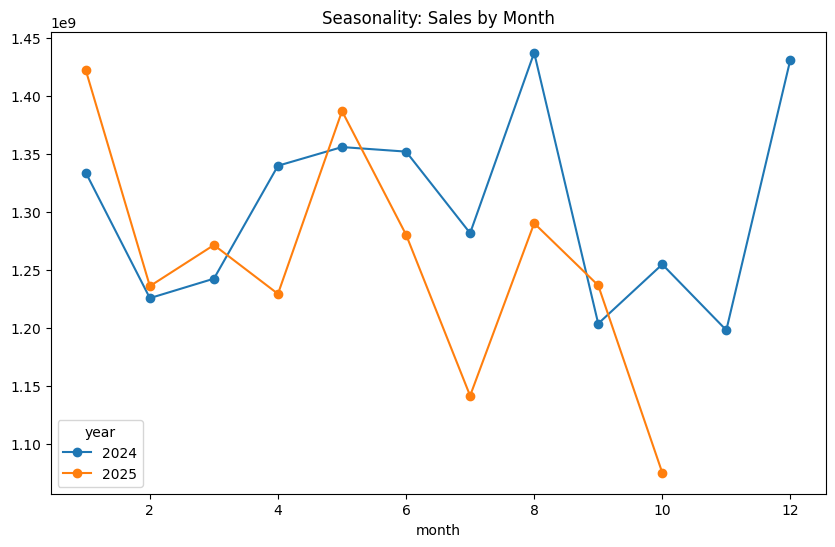

In [ ]:
raw_data['Sales'] = raw_data['Units_On_Hand'] * raw_data['Unit_Price']
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%d-%m-%Y', errors='coerce')
raw_data['year'] = raw_data['Date'].dt.year
raw_data['month'] = raw_data['Date'].dt.month
monthly_sales = raw_data.groupby(['year','month'])['Sales'].sum().unstack(0)
monthly_sales.plot(figsize=(10,6), marker='o', title="Seasonality: Sales by Month")
plt.show()

## Top products sold

### Subtask:
Determine the top-selling products based on the `Sales` column.


**Reasoning**:
Group the data by product name, sum the sales, sort, and display the top 10.



In [ ]:
top_products = raw_data.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False)
print("Top 10 Products by Sales:")
print(top_products.head(10))

Top 10 Products by Sales:
Product_Name
Coca Cola 500ml       1619907673
Sony Headphones       1616814537
Samsung Galaxy A15    1569594152
Raymond Shirt         1502502027
Dettol Handwash       1453776471
Maggi Noodles         1448648536
Adidas T-Shirt        1442759696
LG Refrigerator       1434979418
Britannia Biscuits    1418421876
Parle-G Biscuits      1403500261
Name: Sales, dtype: int64


**Reasoning**:
Group the data by Region and Product_Type, sum the Sales, unstack to create a pivot table, and then display the pivot table.



## Discount impact analysis

### Subtask:
Analyze the relationship between `Discount` and `Sales` to understand the impact of discounts.


**Reasoning**:
Convert the 'Discount' column to a numerical data type and create a scatter plot to visualize the relationship between 'Discount' and 'Sales'.



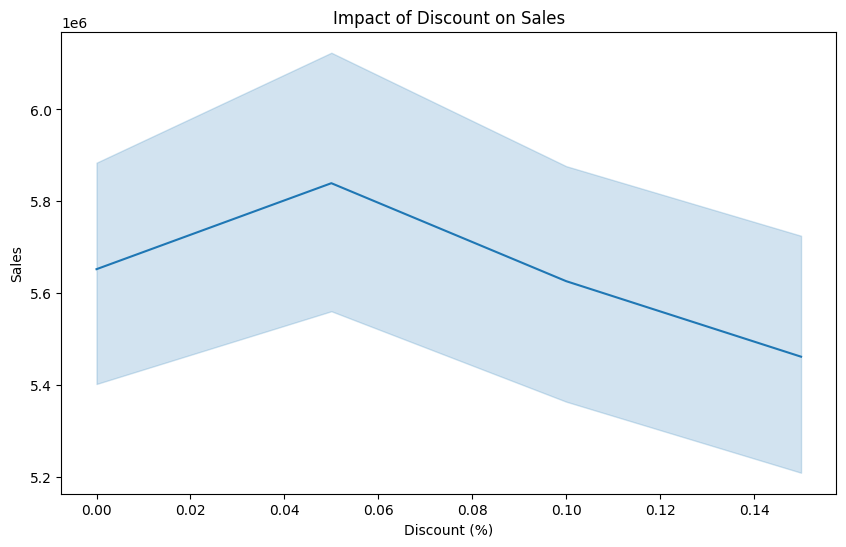

In [ ]:
raw_data['discount_numeric'] = raw_data['Discount'].str.replace('%', '',regex=False).astype(float) / 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=raw_data, x='discount_numeric', y='Sales')
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Sales')
plt.show()

## Regional product type sales

### Subtask:
Analyze sales of different product types within each region.


**Reasoning**:
Create a bar plot for the top 10 products and a heatmap for regional product sales as instructed in the subtask.



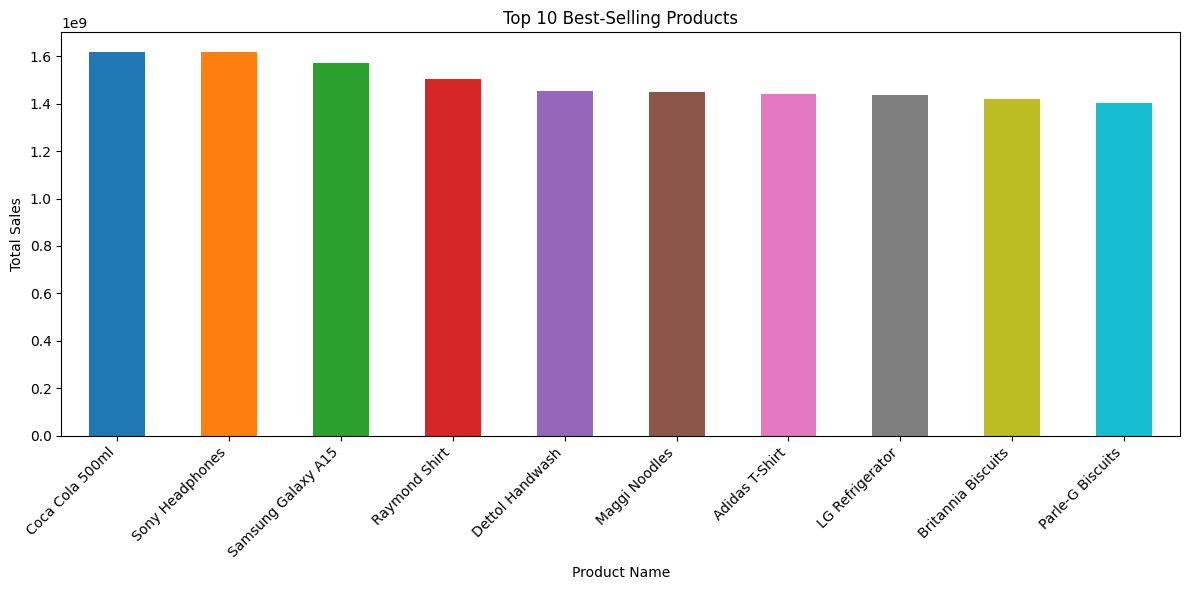

In [ ]:
colors=plt.cm.tab10.colors
plt.figure(figsize=(12, 6))
top_products.head(10).plot(kind='bar', color=colors)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
regional_product_sales = raw_data.groupby(['Region', 'Product_Type'])['Sales'].sum().unstack()
display(regional_product_sales)

Product_Type,Apparel,Electronics,Food & Beverage,Personal Care
Region,,,,
East,1250218874,1481866124,3544457023,1087587491
North,1100773883,1551779155,3347071102,911055210
South,868941934,1461006871,3659111990,1081990561
West,914143485,1466087498,3464649216,1042907109


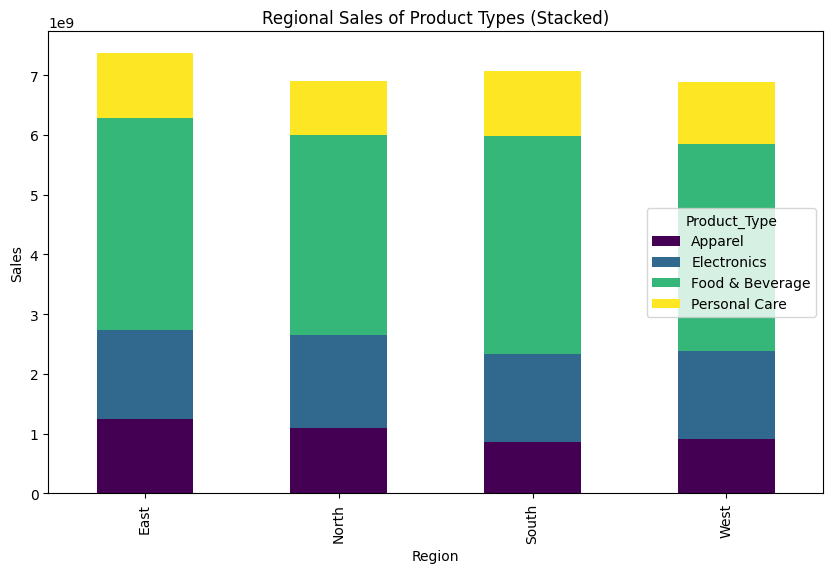

In [ ]:
regional_product_sales = raw_data.pivot_table(
    values="Sales", index="Region", columns="Product_Type", aggfunc="sum", fill_value=0
)

regional_product_sales.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Regional Sales of Product Types (Stacked)")
plt.ylabel("Sales")
plt.show()

## Summarize findings

### Subtask:
Summarize the key insights from the visualizations created in the previous steps.


**Reasoning**:
Analyze the visualizations to summarize the key insights about top products, regional sales by product type, and the impact of discounts on sales.



## Summary:

### Data Analysis Key Findings

*   **Top-Selling Products:** 'Coca Cola 500ml' is the leading product by sales, followed by 'Sony Headphones' and 'Samsung Galaxy A15', indicating high demand for beverages and electronics.
*   **Regional Product Type Sales:** 'Food & Beverage' is the dominant product type in terms of sales across all regions, with particularly strong performance in the South and East regions. 'Electronics' also shows good sales figures across all regions.
*   **Discount Impact:** The analysis did not reveal a clear linear relationship between discount percentage and sales. High sales occur at various discount levels, suggesting that other factors significantly influence sales performance.

### Insights or Next Steps

*   Investigate other factors that might influence sales, such as marketing spend, seasonality, or customer demographics, to understand their interaction with discounts.
*   Analyze the sales data at a more granular level (e.g., by store or customer segment) to identify more specific trends and opportunities within the top-performing regions and product categories.


step 4: Saving the Cleaned Dataset

In [ ]:
raw_data.columns = raw_data.columns.str.strip().str.lower().str.replace(' ', '_')
raw_data['date'] = pd.to_datetime(raw_data['date'], format='%d-%m-%Y', errors='coerce')



In [ ]:

# assuming your cleaned dataframe is called df_cleaned
raw_data.to_csv("Cleaned_inventory_dataset.csv", index=False)


# Feature engineering

*   holidays
*   promotion


*  safety stock
*  lead time


*   inventory management techniques
*   profit -- annual sales value









## Feature Engineering: Profit

### Subtask:
Calculate the profit for each transaction.

**Reasoning**:
Profit can be calculated as the difference between Unit_Price and Unit_Cost, multiplied by Units_On_Hand (assuming these are units sold).

In [ ]:
cleaned_data=pd.read_csv('/content/Cleaned_inventory_dataset.csv')
cleaned_data.head()

,date,product_id,product_name,product_type,store_id,region,city,units_on_hand,reorder_level,unit_cost,unit_price,discount,supplier,seasonality,year,month,sales,discount_numeric
0,01-01-2024,P00015,Tata Tea 250g,Food & Beverage,S15,East,Bhubaneswar,35,65,28361,30926,15%,Tata,Winter,2024,1,1082410,0.15
1,01-01-2024,P00016,LG Refrigerator,Electronics,S14,North,Lucknow,69,80,30573,34843,5%,LG,Summer,2024,1,2404167,0.05
2,01-01-2024,P00005,Dove Soap 100g,Personal Care,S38,South,Bangalore,423,7,2680,7323,0%,Unilever,All-Season,2024,1,3097629,0.00
3,01-01-2024,P00010,Amul Butter 500g,Food & Beverage,S39,North,Lucknow,386,12,25105,30073,5%,Amul,Winter,2024,1,11608178,0.05
4,01-01-2024,P00019,Adidas T-Shirt,Apparel,S11,East,Bhubaneswar,117,64,26301,30311,5%,Adidas,All-Season,2024,1,3546387,0.05


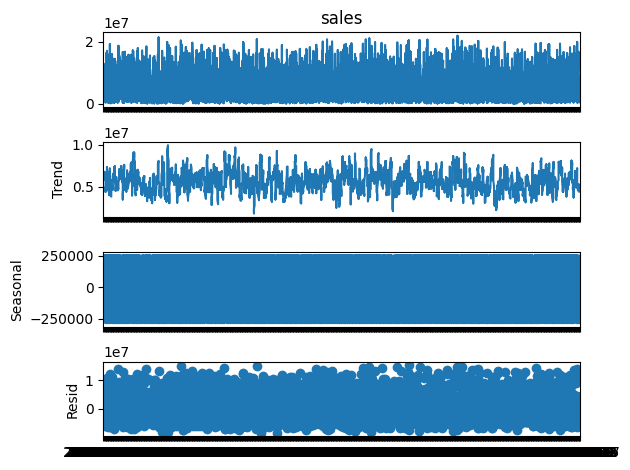

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Suppose df['date'] and df['sales'] exist
# cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%d-%m-%Y') # This line is not needed after loading with parse_dates
df = cleaned_data.set_index('date')

# Monthly frequency
result = seasonal_decompose(df['sales'], model='additive', period=12)

# Plot decomposition
result.plot()
plt.show()

## Feature Engineering: Safety Stock

### Subtask:
Estimate the safety stock for each product.

**Reasoning**:
A simple estimation of safety stock can be a percentage of the reorder level or based on historical demand variability. For simplicity, let's assume safety stock is a percentage of the reorder level.

In [ ]:
cleaned_data['profit'] = (cleaned_data['unit_price'] - cleaned_data['unit_cost']) * cleaned_data['units_on_hand']
display(cleaned_data[['unit_price', 'unit_cost', 'units_on_hand', 'profit']].head())

,unit_price,unit_cost,units_on_hand,profit
0,30926,28361,35,89775
1,34843,30573,69,294630
2,7323,2680,423,1963989
3,30073,25105,386,1917648
4,30311,26301,117,469170


In [ ]:
!pip install holidays

In [ ]:
import numpy as np

# Define lead time assignment logic
def assign_lead_time(product_type):
    if product_type in ["Food & Beverage", "Personal Care", "FMCG"]:
        return np.random.randint(2, 6)   # 2–5 days
    elif product_type in ["Apparel", "Clothing", "Fashion"]:
        return np.random.randint(5, 11)  # 5–10 days
    elif product_type in ["Electronics", "Appliances"]:
        return np.random.randint(7, 16)  # 7–15 days
    elif product_type in ["Furniture", "Home Decor"]:
        return np.random.randint(10, 21) # 10–20 days
    else:
        return 7  # default fallback

# Base lead times by product type
cleaned_data['lead_time'] = cleaned_data['product_type'].apply(assign_lead_time)

# Add supplier reliability variation (±2 days)
np.random.seed(42)  # reproducibility
variation = np.random.randint(-2, 3, size=len(cleaned_data))  # values between -2 and +2
cleaned_data['lead_time'] = (cleaned_data['lead_time'] + variation).clip(lower=1)  # ensure min 1 day

# Preview updated dataset
print(cleaned_data[['product_id', 'product_name', 'product_type', 'lead_time']].head(10))


  product_id        product_name     product_type  lead_time
0     P00015       Tata Tea 250g  Food & Beverage          4
1     P00016     LG Refrigerator      Electronics         15
2     P00005      Dove Soap 100g    Personal Care          5
3     P00010    Amul Butter 500g  Food & Beverage          5
4     P00019      Adidas T-Shirt          Apparel          8
5     P00018          Puma Shoes          Apparel          8
6     P00017     Sony Headphones      Electronics         10
7     P00006  Samsung Galaxy A15      Electronics         11
8     P00007      Red Bull 250ml  Food & Beverage          2
9     P00009     Dettol Handwash    Personal Care          6


In [ ]:
import pandas as pd
import holidays

# Ensure datetime format
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce')

# Generate Indian holidays for all years in dataset, excluding NaT values
valid_years = cleaned_data['date'].dropna().dt.year.unique()
india_holidays = holidays.India(years=valid_years)

# Convert holiday keys to pandas Timestamps
holiday_map = {pd.to_datetime(day): name for day, name in india_holidays.items()}

# Create columns
cleaned_data['holiday'] = cleaned_data['date'].isin(holiday_map.keys()).astype(int)
cleaned_data['holiday_name'] = cleaned_data['date'].map(holiday_map).fillna("None")

display(cleaned_data[['date', 'holiday', 'holiday_name']].head())

,date,holiday,holiday_name
0,2024-01-01,0,None
1,2024-01-01,0,None
2,2024-01-01,0,None
3,2024-01-01,0,None
4,2024-01-01,0,None


In [ ]:
cleaned_data = cleaned_data.drop(columns=['safety_stock','demand_units', 'reorder_point', 'reorder_flag'])

In [ ]:
display(cleaned_data)

,date,product_id,product_name,product_type,store_id,region,city,units_on_hand,reorder_level,unit_cost,unit_price,discount,supplier,seasonality,year,month,sales,discount_numeric,lead_time
0,2024-01-01,P00015,Tata Tea 250g,Food & Beverage,S15,East,Bhubaneswar,35,65,28361,30926,15%,Tata,Winter,2024,1,1082410,0.15,6
1,2024-01-01,P00016,LG Refrigerator,Electronics,S14,North,Lucknow,69,80,30573,34843,5%,LG,Summer,2024,1,2404167,0.05,16
2,2024-01-01,P00005,Dove Soap 100g,Personal Care,S38,South,Bangalore,423,7,2680,7323,0%,Unilever,All-Season,2024,1,3097629,0.00,5
3,2024-01-01,P00010,Amul Butter 500g,Food & Beverage,S39,North,Lucknow,386,12,25105,30073,5%,Amul,Winter,2024,1,11608178,0.05,7
4,2024-01-01,P00019,Adidas T-Shirt,Apparel,S11,East,Bhubaneswar,117,64,26301,30311,5%,Adidas,All-Season,2024,1,3546387,0.05,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaT,P00013,Britannia Biscuits,Food & Beverage,S38,East,Kolkata,36,49,12090,12549,0%,Britannia,All-Season,2025,10,451764,0.00,4
4996,NaT,P00016,LG Refrigerator,Electronics,S15,West,Mumbai,483,54,17629,17928,10%,LG,Summer,2025,10,8659224,0.10,10
4997,NaT,P00020,Raymond Shirt,Apparel,S47,East,Kolkata,310,72,3981,8972,10%,Raymond,Festive,2025,10,2781320,0.10,10
4998,NaT,P00003,Coca Cola 500ml,Food & Beverage,S33,East,Bhubaneswar,98,73,13924,15036,15%,CocaCola,Summer,2025,10,1473528,0.15,4


In [ ]:
import numpy as np
import pandas as pd

# ---- Config ----
SERVICE_LEVEL = 0.95   # Target service level
Z = 1.645              # z-score for 95% service level

# Ensure date is datetime
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce')

# Demand units: prefer 'units_sold', else sales / unit_cost
if 'units_sold' in cleaned_data.columns:
    cleaned_data['demand_units'] = cleaned_data['units_sold']
else:
    cleaned_data['demand_units'] = (
        cleaned_data['sales'] / cleaned_data['unit_cost']
    ).replace([np.inf, -np.inf], np.nan).fillna(0)

# ---- Compute per product stats ----
# Aggregate daily demand per product
daily = (
    cleaned_data.groupby(['product_id', 'date'], as_index=False)['demand_units']
    .sum()
)

# Demand stats
d_stats = daily.groupby('product_id')['demand_units'].agg(
    avg_daily_demand='mean',
    sd_daily_demand=lambda x: x.std(ddof=1)
)

# Lead time stats
lt_stats = cleaned_data.groupby('product_id')['lead_time'].agg(
    avg_lead_time='mean',
    sd_lead_time=lambda x: x.std(ddof=1)
)

# Merge stats
stats = d_stats.join(lt_stats, how='left').fillna(0)

# ---- Safety Stock formula ----
# SS = z * sqrt( (σ_d^2 * L̄) + (μ_d^2 * σ_L^2) )
stats['safety_stock'] = np.ceil(
    Z * np.sqrt(
        (stats['sd_daily_demand'] ** 2) * stats['avg_lead_time'] +
        (stats['avg_daily_demand'] ** 2) * (stats['sd_lead_time'] ** 2)
    )
).astype('Int64')

# ---- Merge back into dataset ----
cleaned_data = cleaned_data.merge(
    stats[['safety_stock']], left_on='product_id', right_index=True, how='left'
)

# Preview
print(cleaned_data[['product_id','product_name','lead_time','safety_stock']].head(10))


  product_id        product_name  lead_time  safety_stock
0     P00015       Tata Tea 250g          4          1328
1     P00016     LG Refrigerator         15          5299
2     P00005      Dove Soap 100g          5          1926
3     P00010    Amul Butter 500g          5          1915
4     P00019      Adidas T-Shirt          8          2290
5     P00018          Puma Shoes          8          2302
6     P00017     Sony Headphones         10          2720
7     P00006  Samsung Galaxy A15         11          2182
8     P00007      Red Bull 250ml          2          1678
9     P00009     Dettol Handwash          6          1502


In [ ]:
import numpy as np
import pandas as pd

# Ensure date column is datetime
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce')
cleaned_data = cleaned_data.sort_values(['product_id', 'date'])

# Use demand units (fallback to sales/unit_price if missing)
if 'units_sold' in cleaned_data.columns:
    cleaned_data['demand_units'] = cleaned_data['units_sold']
else:
    cleaned_data['demand_units'] = (
        cleaned_data['sales'] / cleaned_data['unit_price']
    ).replace([np.inf, -np.inf], np.nan).fillna(0)

# Average daily demand per product
daily_demand = (
    cleaned_data.groupby('product_id')['demand_units']
    .mean()
    .rename('avg_daily_demand')
)

# Average lead time per product
avg_lead = (
    cleaned_data.groupby('product_id')['lead_time']
    .mean()
    .rename('avg_lead_time')
)

# Merge demand and lead time
stats = pd.concat([daily_demand, avg_lead], axis=1)

# Compute reorder point (ROP = Avg Daily Demand × Avg Lead Time + Safety Stock)
stats['reorder_point'] = (
    (stats['avg_daily_demand'] * stats['avg_lead_time']) +
    cleaned_data.groupby('product_id')['safety_stock'].first()
).round().astype('Int64')

# Merge back into dataset
cleaned_data = cleaned_data.merge(
    stats[['reorder_point']],
    left_on='product_id', right_index=True, how='left'
)

# Preview
print(cleaned_data[['product_id','product_name','product_type','lead_time','safety_stock','reorder_point']].head(10))


    product_id product_name     product_type  lead_time  safety_stock  \
18      P00001   Dairy Milk  Food & Beverage          3          1501   
26      P00001   Dairy Milk  Food & Beverage          3          1501   
76      P00001   Dairy Milk  Food & Beverage          2          1501   
85      P00001   Dairy Milk  Food & Beverage          2          1501   
88      P00001   Dairy Milk  Food & Beverage          5          1501   
106     P00001   Dairy Milk  Food & Beverage          3          1501   
127     P00001   Dairy Milk  Food & Beverage          5          1501   
142     P00001   Dairy Milk  Food & Beverage          6          1501   
151     P00001   Dairy Milk  Food & Beverage          1          1501   
161     P00001   Dairy Milk  Food & Beverage          2          1501   

     reorder_point  
18            2475  
26            2475  
76            2475  
85            2475  
88            2475  
106           2475  
127           2475  
142           2475  
151    

In [ ]:
display(cleaned_data)

,date,product_id,product_name,product_type,store_id,region,city,units_on_hand,reorder_level,unit_cost,...,supplier,seasonality,year,month,sales,discount_numeric,lead_time,units_sold,Promotion_Flag,profit
0,2024-01-01,P00015,Tata Tea 250g,Food & Beverage,S15,East,Bhubaneswar,35,65,28361,...,Tata,Winter,2024,1,1082410,0.15,6,35,1,89775
1,2024-01-01,P00016,LG Refrigerator,Electronics,S14,North,Lucknow,69,80,30573,...,LG,Summer,2024,1,2404167,0.05,16,69,1,294630
2,2024-01-01,P00005,Dove Soap 100g,Personal Care,S38,South,Bangalore,423,7,2680,...,Unilever,All-Season,2024,1,3097629,0.00,5,423,0,1963989
3,2024-01-01,P00010,Amul Butter 500g,Food & Beverage,S39,North,Lucknow,386,12,25105,...,Amul,Winter,2024,1,11608178,0.05,7,386,1,1917648
4,2024-01-01,P00019,Adidas T-Shirt,Apparel,S11,East,Bhubaneswar,117,64,26301,...,Adidas,All-Season,2024,1,3546387,0.05,12,117,1,469170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaT,P00013,Britannia Biscuits,Food & Beverage,S38,East,Kolkata,36,49,12090,...,Britannia,All-Season,2025,10,451764,0.00,4,36,0,16524
4996,NaT,P00016,LG Refrigerator,Electronics,S15,West,Mumbai,483,54,17629,...,LG,Summer,2025,10,8659224,0.10,10,483,1,144417
4997,NaT,P00020,Raymond Shirt,Apparel,S47,East,Kolkata,310,72,3981,...,Raymond,Festive,2025,10,2781320,0.10,10,310,1,1547210
4998,NaT,P00003,Coca Cola 500ml,Food & Beverage,S33,East,Bhubaneswar,98,73,13924,...,CocaCola,Summer,2025,10,1473528,0.15,4,98,1,108976


# Step 6: Apply inventory techniques

*   ABC classification
*   EOQ


*   DOH
*   Stock Risk & Overstock detection





In [ ]:
import pandas as pd

# --- Step 1: Compute annual consumption value ---
# If you already have 'sales' column, we can use it directly
abc = cleaned_data.groupby('product_id').agg(
    product_name=('product_name', 'first'),
    total_sales=('sales', 'sum')
).reset_index()

# --- Step 2: Sort products by total sales (descending) ---
abc = abc.sort_values('total_sales', ascending=False).reset_index(drop=True)

# --- Step 3: Calculate cumulative share ---
abc['cummulative_sales'] = abc['total_sales'].cumsum()
abc['cummulative_percentage'] = 100 * abc['cummulative_sales'] / abc['total_sales'].sum()

# --- Step 4: Assign ABC class ---
def classify(cum_pct):
    if cum_pct<= 80:   # Top 80% → A
        return 'A'
    elif cum_pct <= 95: # Next 15% → B
        return 'B'
    else:               # Last 5% → C
        return 'C'

abc['ABC_class'] = abc['cummulative_percentage'].apply(classify)

# --- Step 5: Merge back into main dataset ---
cleaned_data = cleaned_data.merge(
    abc[['product_id','ABC_class']],
    on='product_id', how='left'
)

# Preview result
print(abc.head(15))
print(cleaned_data[['product_id','product_name','ABC_class']].head(10))

   product_id        product_name  total_sales  cummulative_sales  \
0      P00003     Coca Cola 500ml   1619907673         1619907673   
1      P00017     Sony Headphones   1616814537         3236722210   
2      P00006  Samsung Galaxy A15   1569594152         4806316362   
3      P00020       Raymond Shirt   1502502027         6308818389   
4      P00009     Dettol Handwash   1453776471         7762594860   
5      P00008       Maggi Noodles   1448648536         9211243396   
6      P00019      Adidas T-Shirt   1442759696        10654003092   
7      P00016     LG Refrigerator   1434979418        12088982510   
8      P00013  Britannia Biscuits   1418421876        13507404386   
9      P00014    Parle-G Biscuits   1403500261        14910904647   
10     P00002         Pepsi 500ml   1394078258        16304982905   
11     P00001          Dairy Milk   1392065084        17697047989   
12     P00010    Amul Butter 500g   1388016344        19085064333   
13     P00004  Colgate Toothpaste 

In [ ]:
import numpy as np
import pandas as pd

# Ensure date column is datetime
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce')
cleaned_data['year'] = cleaned_data['date'].dt.year

# -------------------
# Annual Sales (₹)
# -------------------
annual_sales = (
    cleaned_data.groupby(['product_id', 'year'])['sales']
    .sum()
    .reset_index()
    .rename(columns={'sales': 'annual_sales'})
)

# -------------------
# Annual Demand (Units)
# -------------------
# Use units_sold if available, otherwise estimate from sales / unit_cost
if 'units_sold' in cleaned_data.columns:
    cleaned_data['demand_units'] = cleaned_data['units_sold']
else:
    cleaned_data['demand_units'] = (
        cleaned_data['sales'] / cleaned_data['unit_cost']
    ).replace([np.inf, -np.inf], np.nan).fillna(0)

annual_demand = (
    cleaned_data.groupby(['product_id', 'year'])['demand_units']
    .sum()
    .reset_index()
    .rename(columns={'demand_units': 'annual_demand'})
)

# -------------------
# Merge both
# -------------------
annual_summary = pd.merge(annual_sales, annual_demand,
                          on=['product_id','year'], how='inner')

print(annual_summary.head(10))


  product_id  year  annual_sales  annual_demand
0     P00001  2024     731647885   44276.221276
1     P00001  2025     660417199   40489.229934
2     P00002  2024     732936008   56941.670249
3     P00002  2025     661142250   35130.927425
4     P00003  2024    1003274040  119995.283147
5     P00003  2025     616633633   33170.809688
6     P00004  2024     736435792   44082.769445
7     P00004  2025     645459023   38233.955378
8     P00005  2024     693133955   46015.042359
9     P00005  2025     594735130   44908.814585


In [ ]:
# Calculate units sold from sales / unit price
cleaned_data['units_sold'] = (
    cleaned_data['sales'] / cleaned_data['unit_price']
).replace([np.inf, -np.inf], np.nan).fillna(0).round().astype(int)

# Preview result
print(cleaned_data[['date','product_id','product_name','sales','unit_price','units_sold']].head(10))


        date product_id        product_name     sales  unit_price  units_sold
0 2024-01-01     P00015       Tata Tea 250g   1082410       30926          35
1 2024-01-01     P00016     LG Refrigerator   2404167       34843          69
2 2024-01-01     P00005      Dove Soap 100g   3097629        7323         423
3 2024-01-01     P00010    Amul Butter 500g  11608178       30073         386
4 2024-01-01     P00019      Adidas T-Shirt   3546387       30311         117
5 2024-02-01     P00018          Puma Shoes   2492500        9970         250
6 2024-02-01     P00017     Sony Headphones  10396278       28719         362
7 2024-02-01     P00006  Samsung Galaxy A15    994762       23134          43
8 2024-02-01     P00007      Red Bull 250ml   8049852       25314         318
9 2024-02-01     P00009     Dettol Handwash   4381960        9526         460


In [ ]:
import numpy as np

ordering_cost = 500

cleaned_data['Annual_Demand'] = cleaned_data['units_sold']   # or aggregated per year
cleaned_data['Holding_Cost'] = 0.10 * cleaned_data['unit_cost']

cleaned_data['EOQ'] = np.sqrt(
    (2 * cleaned_data['Annual_Demand'] * ordering_cost) / cleaned_data['Holding_Cost'].replace(0, np.nan)
)

cleaned_data['EOQ'] = cleaned_data['EOQ'].fillna(0).round().astype(int)
print(cleaned_data[['product_id','product_name','EOQ','Holding_Cost']].head(10))


  product_id product_name  EOQ  Holding_Cost
0     P00001   Dairy Milk    6        3854.3
1     P00001   Dairy Milk    8        3781.6
2     P00001   Dairy Milk   14        2341.1
3     P00001   Dairy Milk   22         847.0
4     P00001   Dairy Milk    9        3681.3
5     P00001   Dairy Milk   11        1501.9
6     P00001   Dairy Milk   16        1852.9
7     P00001   Dairy Milk   28         307.0
8     P00001   Dairy Milk   12         987.3
9     P00001   Dairy Milk   17        1557.8


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2012 non-null   datetime64[ns]
 1   product_id        5000 non-null   object        
 2   product_name      5000 non-null   object        
 3   product_type      5000 non-null   object        
 4   store_id          5000 non-null   object        
 5   region            5000 non-null   object        
 6   city              5000 non-null   object        
 7   units_on_hand     5000 non-null   int64         
 8   reorder_level     5000 non-null   int64         
 9   unit_cost         5000 non-null   int64         
 10  unit_price        5000 non-null   int64         
 11  discount          5000 non-null   object        
 12  supplier          5000 non-null   object        
 13  seasonality       5000 non-null   object        
 14  year              5000 n

In [ ]:
cleaned_data['Inventory_Turnover']=cleaned_data['Annual_Demand']/(cleaned_data['units_on_hand']+1)

In [ ]:
cleaned_data['DOH']=365/(cleaned_data['Inventory_Turnover']+ 1e-5)

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                5000 non-null   datetime64[ns]
 1   product_id          5000 non-null   object        
 2   product_name        5000 non-null   object        
 3   product_type        5000 non-null   object        
 4   store_id            5000 non-null   object        
 5   region              5000 non-null   object        
 6   city                5000 non-null   object        
 7   units_on_hand       5000 non-null   int64         
 8   reorder_level       5000 non-null   int64         
 9   unit_cost           5000 non-null   int64         
 10  unit_price          5000 non-null   int64         
 11  discount            5000 non-null   object        
 12  supplier            5000 non-null   object        
 13  seasonality         5000 non-null   object      

In [ ]:
cleaned_data['Stockout_Risk'] = cleaned_data['units_on_hand'] < cleaned_data['reorder_point']


In [ ]:
cleaned_data['Overstocked'] = (
    (cleaned_data['units_on_hand'] > 1.5 * cleaned_data['reorder_point']) &
    (cleaned_data['demand_units'] < 0.5 * cleaned_data['reorder_point'])
)


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                5000 non-null   datetime64[ns]
 1   product_id          5000 non-null   object        
 2   product_name        5000 non-null   object        
 3   product_type        5000 non-null   object        
 4   store_id            5000 non-null   object        
 5   region              5000 non-null   object        
 6   city                5000 non-null   object        
 7   units_on_hand       5000 non-null   int64         
 8   reorder_level       5000 non-null   int64         
 9   unit_cost           5000 non-null   int64         
 10  unit_price          5000 non-null   int64         
 11  discount            5000 non-null   object        
 12  supplier            5000 non-null   object        
 13  seasonality         5000 non-null   object      

In [ ]:
cleand_data.to_csv("final.csv", index=False)

In [ ]:
# Promotion Flag: If discount > 0, mark as promotion
cleaned_data['Promotion_Flag'] = (cleaned_data['discount_numeric'] > 0).astype(int)

# Preview
training_dataset=cleaned_data[['date','product_id','units_sold','lead_time','discount_numeric','Promotion_Flag','seasonality','holiday',]].copy()
# Sort by product and date
training_dataset = training_dataset.sort_values(['product_id', 'date'])

# Save to CSV/Excel
training_dataset.to_csv("training_dataset.csv", index=False)
training_dataset.to_excel("training_dataset.xlsx", index=False)

print("training dataset saved with shape:", training_dataset.shape)



training dataset saved with shape: (5000, 8)


In [ ]:
display(training_dataset)

,date,product_id,units_sold,lead_time,discount_numeric,Promotion_Flag,seasonality,holiday
447,2024-01-03,P00001,46,3,0.05,1,Festive,0
1610,2024-01-08,P00001,210,2,0.00,0,Festive,0
2074,2024-01-10,P00001,458,3,0.05,1,Festive,0
2305,2024-01-11,P00001,360,3,0.15,1,Festive,0
250,2024-02-02,P00001,414,1,0.10,1,Festive,0
...,...,...,...,...,...,...,...,...
4717,NaT,P00020,321,9,0.15,1,Festive,0
4738,NaT,P00020,224,7,0.00,0,Festive,0
4798,NaT,P00020,290,12,0.00,0,Festive,0
4970,NaT,P00020,295,8,0.05,1,Festive,0


In [ ]:
print(cleaned_data[['date','product_id','lead_time','discount_numeric','Promotion_Flag','seasonality','holiday']].head(15))

In [ ]:
clean_data=pd.read_csv('/content/Cleaned_inventory_dataset.csv')
clean_data.head()

,date,product_id,product_name,product_type,store_id,region,city,units_on_hand,reorder_level,unit_cost,unit_price,discount,supplier,seasonality,year,month,sales,discount_numeric
0,01-01-2024,P00015,Tata Tea 250g,Food & Beverage,S15,East,Bhubaneswar,35,65,28361,30926,15%,Tata,Winter,2024,1,1082410,0.15
1,01-01-2024,P00016,LG Refrigerator,Electronics,S14,North,Lucknow,69,80,30573,34843,5%,LG,Summer,2024,1,2404167,0.05
2,01-01-2024,P00005,Dove Soap 100g,Personal Care,S38,South,Bangalore,423,7,2680,7323,0%,Unilever,All-Season,2024,1,3097629,0.00
3,01-01-2024,P00010,Amul Butter 500g,Food & Beverage,S39,North,Lucknow,386,12,25105,30073,5%,Amul,Winter,2024,1,11608178,0.05
4,01-01-2024,P00019,Adidas T-Shirt,Apparel,S11,East,Bhubaneswar,117,64,26301,30311,5%,Adidas,All-Season,2024,1,3546387,0.05


In [ ]:
# Select columns needed for forecasting
forecasting_df = cleaned_data[['date', 'product_id','units_sold','lead_time', 'Promotion_Flag', 'holiday','seasonality']].copy()

# Sort by product and date
forecasting_df = forecasting_df.sort_values(['product_id', 'date'])

# Save to CSV/Excel
forecasting_df.to_csv("modeling_dataset.csv", index=False)
forecasting_df.to_excel("modeling_dataset.xlsx", index=False)

print("modeling dataset saved with shape:", forecasting_df.shape)

modeling dataset saved with shape: (5000, 7)


In [ ]:
forecasting_df = clean_data[['date', 'product_id', 'demand_units', 'Promotion_Flag', 'holiday','seasonality']].copy()

# Sort by product and date
forecasting_df = forecasting_df.sort_values(['product_id', 'date'])

KeyError: "['demand_units', 'Promotion_Flag', 'holiday'] not in index"

In [ ]:
# Forecasting dataset
forecasting_df = cleaned_data[[
    "date",
    "product_id",
    "product_name",
    "units_sold",      # target variable
    "holiday",         # useful regressor
    "holiday_name",    # for interpretation
    "Promotion_Flag",    # if you created one
    "seasonality",
    "lead_time"      # if you created one
]]


In [ ]:
forescating

In [ ]:
forecasting_df.to_csv("forecasting_dataset.csv", index=False)



In [ ]:
df=pd.read_csv('/content/forecasting_dataset.csv')
df.shape

(5000, 8)

In [ ]:
df.head()

,date,product_id,product_name,units_sold,holiday,holiday_name,Promotion_Flag,seasonality
0,2024-01-04,P00001,Dairy Milk,140,0,NaN,1,Festive
1,2024-01-05,P00001,Dairy Milk,239,0,NaN,1,Festive
2,2024-01-10,P00001,Dairy Milk,453,0,NaN,0,Festive
3,2024-01-12,P00001,Dairy Milk,401,0,NaN,1,Festive
4,2024-01-13,P00001,Dairy Milk,307,0,NaN,1,Festive


In [ ]:
display()

In [ ]:
display(df)

,date,product_id,product_name,units_sold,holiday,holiday_name,Promotion_Flag,seasonality
0,2024-01-04,P00001,Dairy Milk,140,0,NaN,1,Festive
1,2024-01-05,P00001,Dairy Milk,239,0,NaN,1,Festive
2,2024-01-10,P00001,Dairy Milk,453,0,NaN,0,Festive
3,2024-01-12,P00001,Dairy Milk,401,0,NaN,1,Festive
4,2024-01-13,P00001,Dairy Milk,307,0,NaN,1,Festive
...,...,...,...,...,...,...,...,...
4995,2025-10-07,P00020,Raymond Shirt,426,0,NaN,1,Festive
4996,2025-10-08,P00020,Raymond Shirt,77,0,NaN,0,Festive
4997,2025-10-10,P00020,Raymond Shirt,454,0,NaN,1,Festive
4998,2025-10-23,P00020,Raymond Shirt,295,0,NaN,1,Festive
